# SL-RAT Score Project 

                                                                                                   -Sophia Sarica 


### Introduction

This dataset contains the data from Baltimore County Sewer System SL-RAT Scores.SL-RAT is an acoustic technology that provides blockage measurement within the pipeline and collects data between 0 to 10. Scores between 0 to 3 indicate the sewer line has a blockage and needs to be clean. SL-RAT scores help to identify the pipelines that need to be clean first. 
SL_RAT Analysis project will analyze SL-RAT Sewer System tool degradation over time and predict when the SL- RAT scores would be 0. 
That would help Baltimore County work on cleaning assessments more timely of overall sewer systems.

### Data and Setup

The following columns contain SL-RAT Score data and GIS Attributes data from Baltimore County Sewer Systems.
 

- `FACILITYID`: Unique number between two manholes.  
- `ACTIVITY_CODE`: Activity type on each assessment 
- `COMPLETED_DATE`: Finish day of Activity  
- `SLRAT_SCORE`: Sl-rat scores between 0-10.
- `TYPE`: Type of the pipe 
- `LINING_TYP`: Type of the pipe connections
- `PIPE_SIZE`: Size of Pipe  
- `PIPE_MATER`: Material of Pipe
- `SLOPE`: Slope for each FacilityID 
- `LENGTH`: Lenght of Pipe
- `INSTALL_DA`: Time since the installation date


In [1]:
#importing libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import time
print('Pandas',pd.__version__)

Pandas 1.3.4


In [214]:
# read the SLRAT data 
df= pd.read_excel('SLRAT_analysis.xlsx')

needed_rows = ['SLRAT' in x or 'Clean' in x for x in df['ACTIVITY_CODE']]
df = df[needed_rows].reset_index(drop=True).copy()
df.head()

,source,rk,PK,FACILITYID,WORK_ORDER_NO,ACTIVITY_CODE,activitycode rk,COMPLETED_DATE,slrat only,SLRAT_SCORE,...,rk change,COF,FACILITYID Count,New Asset,ActivityCode lookup,Candidate,Predec. Candidate,Copy,Unnamed: 20,Unnamed: 21
0,city,1.0,10000-10002-790381,10000-10002,790381,Gravity Main-SLRAT,1.0,2020-11-16 09:00:00,SLRAT,0.0,...,0.0,2.335,2,NEW,1,NO,NO,-,NaN,NaN
1,city,2.0,10000-10002-803279,10000-10002,803279,Gravity Main-Clean,NaN,2021-01-10 10:30:00,NaN,NaN,...,NaN,2.335,2,OLD,0,NO,NO,-,NO,42147.0
2,cass,1.0,1000-1000M-20153596301,1000-1000M,20153596301,SLRAT,1.0,2015-12-05 00:00:00,SLRAT,2.0,...,0.0,5.620,5,NEW,1,NO,YES,1000-1000M,YES,3196.0
3,cass,2.0,1000-1000M-20179954401,1000-1000M,20179954401,SLRAT,1.0,2017-10-26 00:00:00,SLRAT,0.0,...,0.0,5.620,5,OLD,1,YES,NO,1000-1000M,NaN,NaN
4,city,1.0,10002-9995-790387,10002-9995,790387,Gravity Main-SLRAT,1.0,2020-11-16 09:30:00,SLRAT,0.0,...,0.0,2.435,2,NEW,1,NO,NO,-,NaN,NaN


### Check for missing values and datatypes


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33807 entries, 0 to 33806
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   source               33807 non-null  object        
 1   rk                   33800 non-null  float64       
 2   PK                   33807 non-null  object        
 3   FACILITYID           33807 non-null  object        
 4   WORK_ORDER_NO        33807 non-null  object        
 5   ACTIVITY_CODE        33807 non-null  object        
 6   activitycode rk      33359 non-null  float64       
 7   COMPLETED_DATE       33807 non-null  datetime64[ns]
 8   slrat only           33359 non-null  object        
 9   SLRAT_SCORE          33359 non-null  float64       
 10  score change         33359 non-null  float64       
 11  day change           33359 non-null  float64       
 12  rk change            33359 non-null  float64       
 13  COF                  33737 non-

In [216]:
#Select necessary columns from SL-RAT file
columns= ['FACILITYID','COMPLETED_DATE', 'SLRAT_SCORE']

In [217]:
df=df[columns]

In [220]:
df.head()

,FACILITYID,COMPLETED_DATE,SLRAT_SCORE
0,10000-10002,2020-11-16 09:00:00,0.0
1,10000-10002,2021-01-10 10:30:00,NaN
2,1000-1000M,2015-12-05 00:00:00,2.0
3,1000-1000M,2017-10-26 00:00:00,0.0
4,10002-9995,2020-11-16 09:30:00,0.0


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33807 entries, 0 to 33806
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FACILITYID      33807 non-null  object        
 1   COMPLETED_DATE  33807 non-null  datetime64[ns]
 2   SLRAT_SCORE     33359 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 792.5+ KB


Let's explore the data!

In [222]:
df = df.sort_values(by=['FACILITYID','COMPLETED_DATE']).reset_index(drop=True).copy()
df.head(15)

,FACILITYID,COMPLETED_DATE,SLRAT_SCORE
0,1000-1000M,2015-12-05 00:00:00,2.0
1,1000-1000M,2017-10-26 00:00:00,0.0
2,10000-10002,2020-11-16 09:00:00,0.0
3,10000-10002,2021-01-10 10:30:00,NaN
4,10002-9995,2020-11-16 09:30:00,0.0
5,10002-9995,2021-03-16 11:30:00,NaN
6,10003-10004,2020-11-17 09:15:00,0.0
7,10003-10004,2021-01-10 09:00:00,NaN
8,10004-9986,2020-11-17 09:30:00,0.0
9,10004-9986,2021-03-15 10:30:00,NaN


### Removal of Unnecessary Data

We need only sl-rat scores that occur more than once.

In [223]:
# Adding&removing rk column to get rid of the unnecessary sl-rat scores
counts = df.FACILITYID.value_counts().to_dict()

df['rk'] = [counts[x] for x in df.FACILITYID]

df = df[df.rk > 1].reset_index(drop=True).copy()
df.drop('rk', axis=1, inplace=True)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FACILITYID      9355 non-null   object        
 1   COMPLETED_DATE  9355 non-null   datetime64[ns]
 2   SLRAT_SCORE     8907 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 219.4+ KB


In [225]:
df.shape

(9355, 3)

In [226]:
(df.COMPLETED_DATE[0] - df.COMPLETED_DATE[1]).days

-691

In [91]:
for i, x in df.head().iterrows():
    print (x.SLRAT_SCORE)
    break

2.0


In [212]:
import numpy as np
def agg_func(x):
    """
    I have made an assumption here. 
    it may have many records and on multiple records, pipes may have been cleaned in between.
    so I checked only the first 2 occurance and calculated the rate.
    eg: first rate 9  on March 1
    second rate 7 on March 15
    I calculated the rate by (7 - 9) / 30 
    
    if rate is positive, I used none because probably it is cleaned and I cannot calculate the rate
    """
#     print(x)
    x = x[~x.SLRAT_SCORE.isna()]
    if len(x) < 2:
        return None
    
    sc = list(x.SLRAT_SCORE)
    dt = list(x.COMPLETED_DATE)

    if pd.isna(sc[1]) or pd.isna(sc[0]):
        return None
    
    if sc[1] >= sc[0]:
        return None
    
    days = (dt[1] - dt[0]).days
    if days == 0:
        return None
    
    return (sc[1] - sc[0]) / days

In [166]:
rate = df.groupby(by='FACILITYID').apply(agg_func)
rate

FACILITYID
1000-1000M    -0.002894
10000-10002         NaN
10002-9995          NaN
10003-10004         NaN
10004-9986          NaN
                 ...   
F1890-F1889         NaN
F1891-F1890         NaN
F1892-F1891         NaN
F4136-63762         NaN
NS968-14335         NaN
Length: 3925, dtype: float64

In [174]:
sum (rate < 0)

1118

In [175]:
df_rate = pd.DataFrame()
df_rate['FACILITYID'] = rate.index
df_rate['rate'] = rate.values

df_rate.dropna(inplace=True)
df_rate.shape

(1118, 2)

I'm trying to get more data.

In [176]:
#Read the data from GIS features
df_GIS= pd.read_excel('ssGravityMain-GIS_Attributes.xlsx')

In [177]:
df_GIS.head().T

,0,1,2,3,4
FACILITYID,42453-42452,42458-42457,42457-42452,42452-42451,42451-42450
TYPE,COLLECTOR,COLLECTOR,COLLECTOR,COLLECTOR,COLLECTOR
SEWER_SERV,83-94-00-00,83-94-00-00,83-94-00-00,83-94-00-00,83-94-00-00
PIPE_SIZE,8,8,8,8,8
PIPE_MATER,UNKNOWN,ASBESTOS CEMENT,ASBESTOS CEMENT,UNKNOWN,UNKNOWN
SLOPE,1.7,0.4,0.4,0.4,0.4
DESIGN_LEN,70.3,71.3,139.1,335.8,387.7
LENGTH,70.33,71.3,139.18,335.83,387.79
UPSTREAM_I,688.36,688.1,687.72,687.07,685.63
DOWNSTREAM,687.17,687.82,687.17,685.73,684.03


In [178]:
#Select important columns from GIS
GIS_columns= ['FACILITYID','TYPE','LINING_TYP','PIPE_SIZE','PIPE_MATER','SLOPE','LENGTH','INSTALL_DA']
df_GIS = df_GIS[GIS_columns]

In [228]:
df_GIS.head()

,FACILITYID,TYPE,LINING_TYP,PIPE_SIZE,PIPE_MATER,SLOPE,LENGTH,INSTALL_DA
0,42453-42452,COLLECTOR,NONE,8,UNKNOWN,1.7,70.33,1970-01-01
1,42458-42457,COLLECTOR,NONE,8,ASBESTOS CEMENT,0.4,71.30,1970-01-01
2,42457-42452,COLLECTOR,NONE,8,ASBESTOS CEMENT,0.4,139.18,1970-01-01
3,42452-42451,COLLECTOR,NONE,8,UNKNOWN,0.4,335.83,1970-01-01
4,42451-42450,COLLECTOR,NONE,8,UNKNOWN,0.4,387.79,1970-01-01


In [229]:
df_GIS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62728 entries, 0 to 62727
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   FACILITYID  62728 non-null  object        
 1   TYPE        62728 non-null  object        
 2   LINING_TYP  62663 non-null  object        
 3   PIPE_SIZE   62728 non-null  int64         
 4   PIPE_MATER  62371 non-null  object        
 5   SLOPE       62728 non-null  float64       
 6   LENGTH      62728 non-null  float64       
 7   INSTALL_DA  61600 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.8+ MB


In [230]:
#Combining two data frame 
df_merged = pd.merge(df_rate, df_GIS,  how='left', left_on=['FACILITYID'],right_on=['FACILITYID'])

In [231]:
df_merged.drop('FACILITYID', axis=1, inplace=True)

In [232]:
df_merged.head()

,rate,TYPE,LINING_TYP,PIPE_SIZE,PIPE_MATER,SLOPE,LENGTH,INSTALL_DA
0,-0.002894,COLLECTOR,NONE,12.0,VITRIFIED CLAY PIPE,0.49,400.69,1926-01-01
1,-0.003315,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.50,374.65,1926-01-01
2,-0.002532,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.00,385.08,1926-01-01
3,-0.003413,COLLECTOR,NONE,15.0,VITRIFIED CLAY PIPE,0.30,302.96,1950-01-01
4,-0.013652,COLLECTOR,NONE,15.0,VITRIFIED CLAY PIPE,0.40,51.09,1950-01-01


In [233]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118 entries, 0 to 1117
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rate        1118 non-null   float64       
 1   TYPE        1113 non-null   object        
 2   LINING_TYP  1113 non-null   object        
 3   PIPE_SIZE   1113 non-null   float64       
 4   PIPE_MATER  1113 non-null   object        
 5   SLOPE       1113 non-null   float64       
 6   LENGTH      1113 non-null   float64       
 7   INSTALL_DA  1105 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 78.6+ KB


In [186]:
# Converting datetime variable 
today = np.datetime64('today') 

def days_passed(d):
    return ( today - d).days


In [188]:
df_merged['time_since_install_da'] = [days_passed(x) for x in df_merged['INSTALL_DA']]
df_merged.drop('INSTALL_DA', axis=1, inplace=True)
df_merged.head()

,rate,TYPE,LINING_TYP,PIPE_SIZE,PIPE_MATER,SLOPE,LENGTH,time_since_install_da
0,-0.002894,COLLECTOR,NONE,12.0,VITRIFIED CLAY PIPE,0.49,400.69,35167.0
1,-0.003315,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.50,374.65,35167.0
2,-0.002532,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.00,385.08,35167.0
3,-0.003413,COLLECTOR,NONE,15.0,VITRIFIED CLAY PIPE,0.30,302.96,26401.0
4,-0.013652,COLLECTOR,NONE,15.0,VITRIFIED CLAY PIPE,0.40,51.09,26401.0


In [189]:
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118 entries, 0 to 1117
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rate                   1118 non-null   float64
 1   TYPE                   1113 non-null   object 
 2   LINING_TYP             1113 non-null   object 
 3   PIPE_SIZE              1113 non-null   float64
 4   PIPE_MATER             1113 non-null   object 
 5   SLOPE                  1113 non-null   float64
 6   LENGTH                 1113 non-null   float64
 7   time_since_install_da  1105 non-null   float64
dtypes: float64(5), object(3)
memory usage: 78.6+ KB


In [190]:
#check the number of rows and columns in the dataframe
df_merged.shape

(1118, 8)

Now, the data is ready for further analysis.


### Sanity check and handling Data Inconsistencies


### Visualizations

<AxesSubplot:>

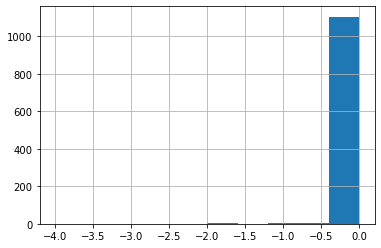

In [195]:
df_merged.rate.hist()

<AxesSubplot:>

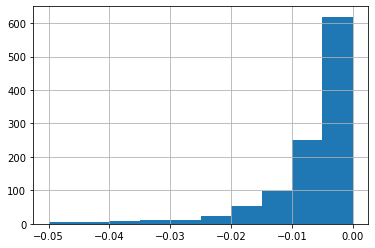

In [235]:
#print(df_merged.rate.value_counts())
df_merged.rate.hist(range=[-0.05 ,0])

COLLECTOR          1112
INVERTED SIPHON       1
Name: TYPE, dtype: int64


<AxesSubplot:>

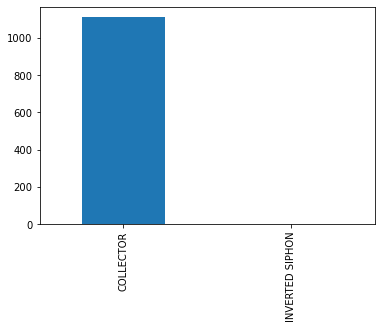

In [200]:
print(df_merged.TYPE.value_counts())
df_merged.TYPE.value_counts().plot(kind='bar')

NONE              962
CURED IN PLACE    131
FOLD AND FORM      10
UNKNOWN             6
Cured in Place      3
PARTIAL LINING      1
Name: LINING_TYP, dtype: int64


<AxesSubplot:>

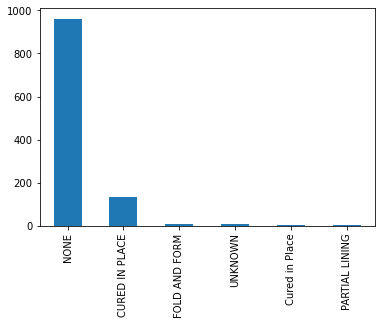

In [201]:
print(df_merged.LINING_TYP.value_counts())
df_merged.LINING_TYP.value_counts().plot(kind='bar')

I noticed some inconsistencies and fixed them below

In [203]:
df_merged.replace({
    'Cured in Place': 'CURED IN PLACE'
}, inplace=True)

NONE              962
CURED IN PLACE    134
FOLD AND FORM      10
UNKNOWN             6
PARTIAL LINING      1
Name: LINING_TYP, dtype: int64


<AxesSubplot:>

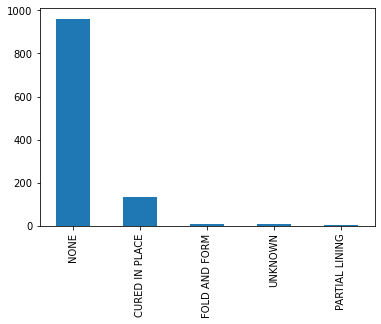

In [204]:
print(df_merged.LINING_TYP.value_counts())
df_merged.LINING_TYP.value_counts().plot(kind='bar')

<AxesSubplot:>

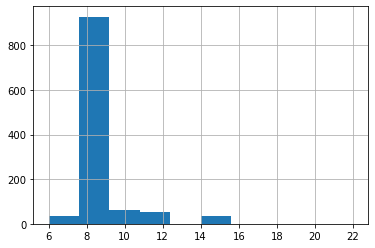

In [205]:
df_merged.PIPE_SIZE.hist()

VITRIFIED CLAY PIPE                845
POLYVINYL CHLORIDE                  96
UNKNOWN                             73
CAST IRON                           38
DUCTILE IRON PIPE                   37
ACRYLONITRILE BUTADIENE STYRENE     10
CONCRETE PIPE                        9
REINFORCED PLASTIC PIPE              3
ASBESTOS CEMENT                      2
Name: PIPE_MATER, dtype: int64


<AxesSubplot:>

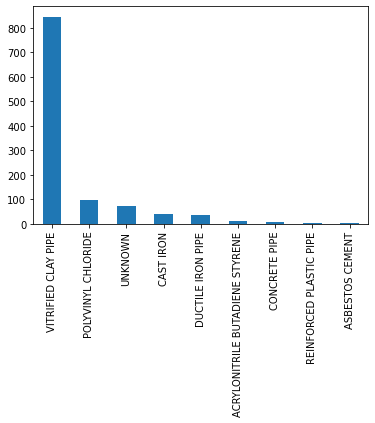

In [206]:

print(df_merged.PIPE_MATER.value_counts())
df_merged.PIPE_MATER.value_counts().plot(kind='bar')

<AxesSubplot:>

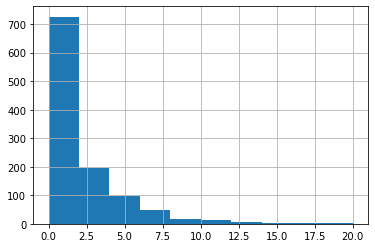

In [207]:
df_merged.SLOPE.hist()

<AxesSubplot:>

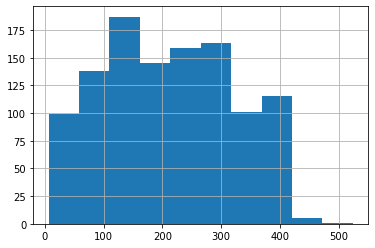

In [208]:
df_merged.LENGTH.hist()